<a href="https://colab.research.google.com/github/jaya-deepthi/adsexperiencial1-eda-/blob/main/Adsexperiancial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np # numerical computing 
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline
df = pd.read_csv('/content/match_data.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,eliminator,dl_applied,win_by_runs,win_by_wickets,result,overs,player_of_match,venue,umpire1,umpire2,umpire3,first_bat_team,first_bowl_team,first_bat_score,second_bat_score
0,419164,2010,Mumbai,2010-04-24,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,bat,Royal Challengers Bangalore,NaN,NaN,NaN,9.0,NaN,20,A Kumble,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,Deccan Chargers,Royal Challengers Bangalore,82.0,86.0
1,419131,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,Delhi Daredevils,NaN,NaN,40.0,NaN,NaN,20,DA Warner,Feroz Shah Kotla,SS Hazare,SJA Taufel,NaN,Delhi Daredevils,Kolkata Knight Riders,177.0,137.0
2,336021,2008,Mumbai,2008-05-16,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,NaN,NaN,NaN,8.0,NaN,20,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,NaN,Kolkata Knight Riders,Mumbai Indians,67.0,68.0
3,980931,2016,Pune,2016-04-22,Rising Pune Supergiants,Royal Challengers Bangalore,Rising Pune Supergiants,field,Royal Challengers Bangalore,NaN,NaN,13.0,NaN,NaN,20,AB de Villiers,Maharashtra Cricket Association Stadium,CB Gaffaney,VK Sharma,NaN,Royal Challengers Bangalore,Rising Pune Supergiants,185.0,172.0
4,419163,2010,Mumbai,2010-04-22,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,NaN,NaN,38.0,NaN,NaN,20,DE Bollinger,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,NaN,Chennai Super Kings,Deccan Chargers,142.0,104.0


# summary analysis

In [ ]:
df.describe()

,id,season,win_by_runs,win_by_wickets,overs,first_bat_score,second_bat_score
count,7.460000e+02,746.000000,336.000000,398.000000,746.0,746.000000,744.000000
mean,7.135520e+05,2013.369973,29.883929,6.251256,20.0,161.356568,147.841398
std,2.845419e+05,3.326906,27.276827,1.821281,0.0,30.537844,31.153406
min,3.359820e+05,2008.000000,1.000000,1.000000,20.0,56.000000,2.000000
25%,5.012092e+05,2011.000000,11.000000,5.000000,20.0,142.000000,131.000000
50%,5.980485e+05,2013.000000,22.000000,6.000000,20.0,163.000000,150.000000
75%,9.809845e+05,2016.000000,39.000000,8.000000,20.0,182.000000,169.000000
max,1.178425e+06,2019.000000,146.000000,10.000000,20.0,263.000000,223.000000


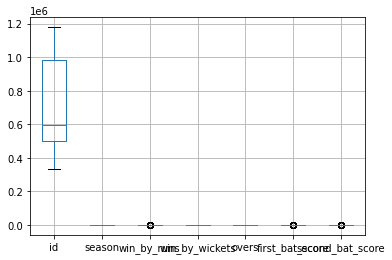

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50a1cba320>,
      dtype=object)

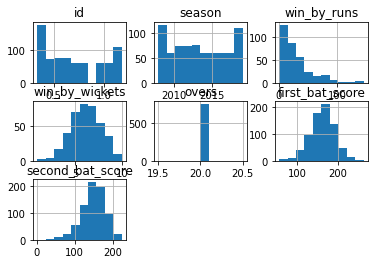

In [ ]:
df.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                746 non-null    int64  
 1   season            746 non-null    int64  
 2   city              733 non-null    object 
 3   date              746 non-null    object 
 4   team1             746 non-null    object 
 5   team2             746 non-null    object 
 6   toss_winner       746 non-null    object 
 7   toss_decision     746 non-null    object 
 8   winner            734 non-null    object 
 9   eliminator        8 non-null      object 
 10  dl_applied        19 non-null     object 
 11  win_by_runs       336 non-null    float64
 12  win_by_wickets    398 non-null    float64
 13  result            12 non-null     object 
 14  overs             746 non-null    int64  
 15  player_of_match   742 non-null    object 
 16  venue             746 non-null    object 
 1

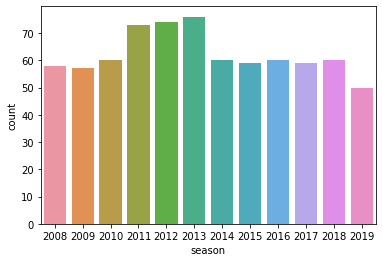

In [ ]:
sns.countplot(x='season', data=df)
plt.show()

# Data Cleaning

In [ ]:
df.drop('overs' ,axis=1 ,inplace=True)

In [ ]:
df.drop('eliminator' ,axis=1 ,inplace=True)

In [ ]:
df.drop('dl_applied' , axis=1 ,inplace=True)

In [ ]:
df.drop('umpire3' ,axis=1 ,inplace=True)

In [ ]:
df.isnull().sum()

id                    0
season                0
city                 13
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner               12
win_by_runs         410
win_by_wickets      348
result              734
player_of_match       4
venue                 0
umpire1               1
umpire2               1
first_bat_team        0
first_bowl_team       0
first_bat_score       0
second_bat_score      2
dtype: int64

In [ ]:
df.replace(to_replace ="Deccan Chargers", 
                 value ="Sunrisers Hyderabad")

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,overs,player_of_match,venue,umpire1,umpire2,first_bat_team,first_bowl_team,first_bat_score,second_bat_score
0,419164,2010,Mumbai,2010-04-24,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Royal Challengers Bangalore,NaN,9.0,20,A Kumble,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,Sunrisers Hyderabad,Royal Challengers Bangalore,82.0,86.0
1,419131,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,Delhi Daredevils,40.0,NaN,20,DA Warner,Feroz Shah Kotla,SS Hazare,SJA Taufel,Delhi Daredevils,Kolkata Knight Riders,177.0,137.0
2,336021,2008,Mumbai,2008-05-16,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,NaN,8.0,20,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,Kolkata Knight Riders,Mumbai Indians,67.0,68.0
3,980931,2016,Pune,2016-04-22,Rising Pune Supergiants,Royal Challengers Bangalore,Rising Pune Supergiants,field,Royal Challengers Bangalore,13.0,NaN,20,AB de Villiers,Maharashtra Cricket Association Stadium,CB Gaffaney,VK Sharma,Royal Challengers Bangalore,Rising Pune Supergiants,185.0,172.0
4,419163,2010,Mumbai,2010-04-22,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,38.0,NaN,20,DE Bollinger,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,Chennai Super Kings,Sunrisers Hyderabad,142.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,1136567,2018,Hyderabad,2018-04-12,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,NaN,1.0,20,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,CK Nandan,Mumbai Indians,Sunrisers Hyderabad,147.0,151.0
742,392209,2009,East London,2009-05-04,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,78.0,NaN,20,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,Chennai Super Kings,Sunrisers Hyderabad,178.0,100.0
743,336012,2008,Bangalore,2008-05-28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,NaN,9.0,20,CRD Fernando,M Chinnaswamy Stadium,BF Bowden,AV Jayaprakash,Royal Challengers Bangalore,Mumbai Indians,122.0,126.0
744,729313,2014,NaN,2014-04-28,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,NaN,5.0,20,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,Royal Challengers Bangalore,Kings XI Punjab,124.0,127.0


In [ ]:
df.replace(to_replace="Delhi Daredevils" ,value="Delhi Capitals" ,inplace=True)

In [ ]:
df.replace(to_replace="Rising Pune Supergiants" ,value="Rising Pune Supergiant" ,inplace=True)

# Exploratory data analysis

Mumbai Indians                 104
Chennai Super Kings             99
Kolkata Knight Riders           91
Royal Challengers Bangalore     82
Kings XI Punjab                 79
Delhi Capitals                  74
Rajasthan Royals                73
Sunrisers Hyderabad             57
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


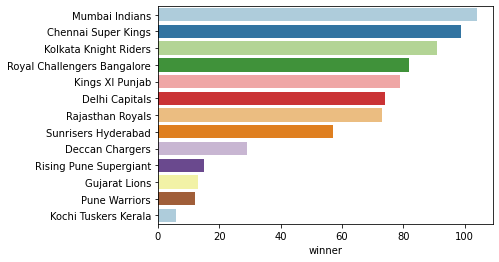

In [ ]:
data = df.winner.value_counts()
print(data)
sns.barplot(y = data.index, x = data, orient='h');

**Creating a table with features having more importance**

In [ ]:
t1 = df.team1.unique()
t1.tolist()
t2 = df.team2.unique()
t2.tolist()
total_teams = list(set(t1) & set(t2))
print (total_teams)
#Total number of teams participating (Team size)
print (len(total_teams))

['Rajasthan Royals', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals', 'Pune Warriors', 'Kings XI Punjab', 'Gujarat Lions', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad']
12


In [ ]:
team_stats = pd.DataFrame({'Total Matches played': df.team1.value_counts() + df.team2.value_counts(), 'Total won': df.winner.value_counts(), 'Toss won': df.toss_winner.value_counts(), 
                          'Total lost': ((df.team1.value_counts() + df.team2.value_counts()) - df.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost
0,Chennai Super Kings,160,99,87,61
1,Deccan Chargers,75,29,43,46
2,Delhi Capitals,13,7,9,6
3,Delhi Daredevils,161,67,80,94
4,Gujarat Lions,30,13,15,17
5,Kings XI Punjab,174,79,80,95
6,Kochi Tuskers Kerala,14,6,8,8
7,Kolkata Knight Riders,176,91,91,85
8,Mumbai Indians,183,104,95,79
9,Pune Warriors,46,12,20,34


total matches played by each team

Text(0.5, 1.0, 'Total matches played by each team')

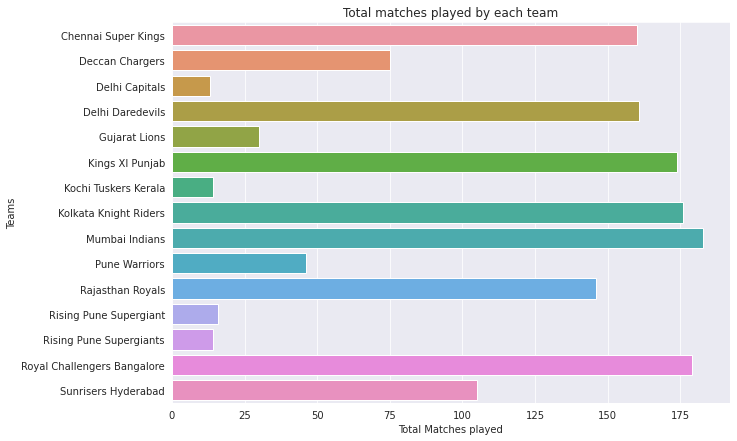

In [ ]:
plt.subplots(figsize=(10,7))
no_of_matchesplayed = team_stats['Total Matches played']
sns.barplot(y = team_stats.Teams, x = no_of_matchesplayed, orient='h');
plt.title("Total matches played by each team")

Maximun toss winners

Text(0.5, 1.0, 'Maximum Toss Won')

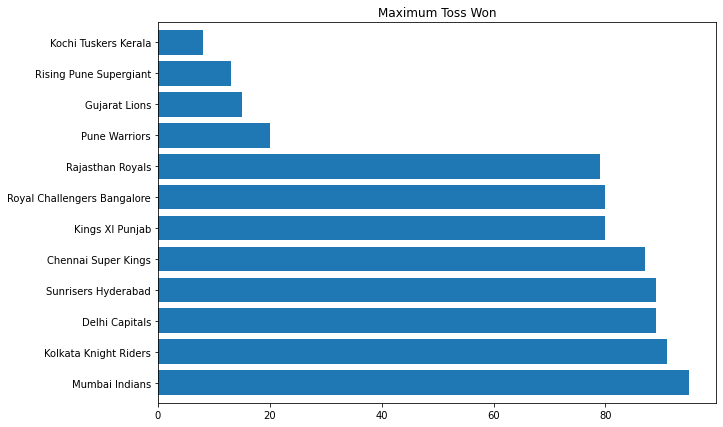

In [ ]:
plt.subplots(figsize=(10,7))
no_of_tosswinnings=df['toss_winner'].value_counts().plot.barh(width=0.8)
plt.title("Maximum Toss Won")

No Of matches played in each season 

2013    76
2012    74
2011    73
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
2019    50
Name: season, dtype: int64


Text(0.5, 1.0, 'Maximum matches played in each season')

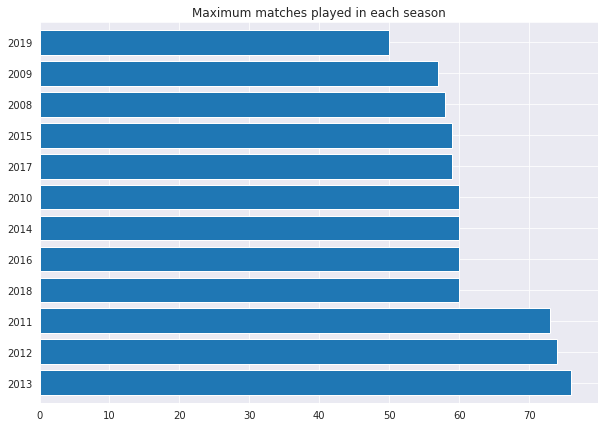

In [ ]:
plt.subplots(figsize=(10,7))
no_of_matches_in_each_season = df['season'].value_counts()
print(no_of_matches_in_each_season)
no_of_matches_in_each_season.plot.barh(width=0.8)
plt.title("Maximum matches played in each season")

**teams who won match and toss in each season**

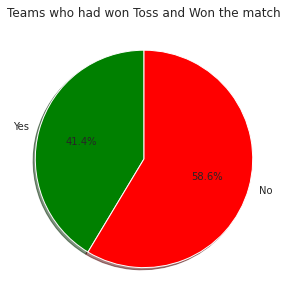

In [ ]:
Tosswin_matchwin1=df[df['toss_winner']==df['winner']]
teams1 = df[df['season']==2008]
total1 = list(set(Tosswin_matchwin1)&set(teams1))
slices=[len(total1),(60-len(total1))]
labels1=['Yes','No']
plt.pie(slices,labels=labels1,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
plt.title("Teams who had won Toss and Won the match in 2008")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

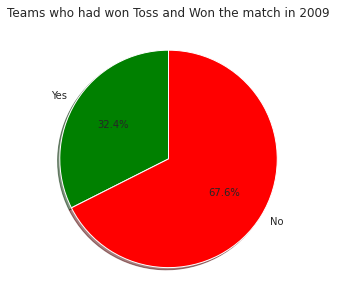

In [ ]:
Tosswin_matchwin2=df[df['toss_winner']==df['winner']]
teams2 = df[df['season']==2013]
total2 = list(set(Tosswin_matchwin2)&set(teams2))
slices2=[len(total2),(74-len(total2))]
labels2=['Yes','No']
plt.pie(slices2,labels=labels2,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
plt.title("Teams who had won Toss and Won the match in 2009")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

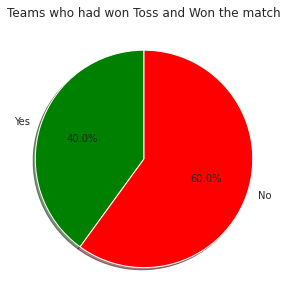

In [ ]:
Twin_mwin3=df[df['toss_winner']==df['winner']]
teams3 = df[df['season']==2010]
total3 = list(set(Twin_mwin3)&set(teams3))
s3=[len(total3),(60-len(total3))]
l3=['Yes','No']
plt.pie(s3,labels=l3,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
plt.title("Teams who had won Toss and Won the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Team Performance

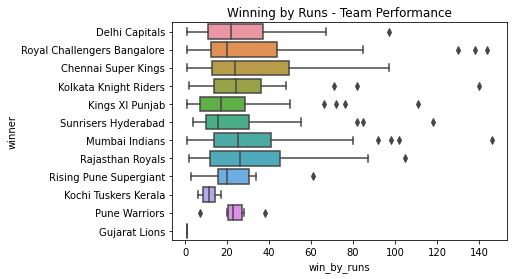

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_runs', data=df[df['win_by_runs']>0], orient = 'h'); 
plt.show()

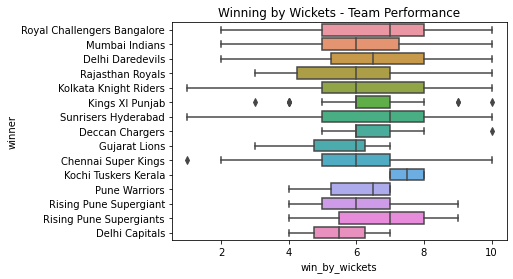

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=df[df['win_by_wickets']>0], orient = 'h'); 
plt.show()

In [ ]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(10)

Finalists

In [ ]:
finalists = df[df['id'].apply(lambda id: id in df.groupby('season')['id'].max().values)].sort_values(by=['season'])[['season','city','date','team1','team2','toss_winner','toss_decision','player_of_match', 'winner']]
finalists.style.apply(lambda x: ['background: royalblue' if x.name == 'winner' else 'background: lightsteelblue' for i in x])

,season,city,date,team1,team2,toss_winner,toss_decision,player_of_match,winner
734,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,YK Pathan,Rajasthan Royals
590,2009,Johannesburg,2009-05-24,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,A Kumble,Deccan Chargers
131,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,SK Raina,Chennai Super Kings
39,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,M Vijay,Chennai Super Kings
608,2012,Chennai,2012-05-27,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,MS Bisla,Kolkata Knight Riders
256,2013,Kolkata,2013-05-26,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,KA Pollard,Mumbai Indians
523,2014,Bangalore,2014-06-01,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,field,MK Pandey,Kolkata Knight Riders
27,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,RG Sharma,Mumbai Indians
50,2016,Bangalore,2016-05-29,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,BCJ Cutting,Sunrisers Hyderabad
113,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,KH Pandya,Mumbai Indians


win loss types

In [ ]:
winloss_types = ['Tie/Wins','Tie/Loss','NR']
played =0
winloss_list1 = []

for t in df.team1.unique():
    for wl in winloss_types:
        Tie = 0
        if wl == 'Tie/Wins':             
            Tie = len(df[((df.result == 'tie') & (df.winner == t)) & ((df.team1 == t) | (df.team2 == t))])            
        elif wl == 'Tie/Loss':
            Tie = len(df[((df.result == 'tie') & (df.winner != t)) & ((df.team1 == t) | (df.team2 == t))])
        elif wl == 'NR':
            Tie = len(df[((df.result == 'no result') & (df.winner != t)) & ((df.team1 == t) | (df.team2 == t))])
        if (Tie!= 0):
            winloss_list1.append(Tie)
        else:
            winloss_list1.append(0)
            
winloss_ser1 = pd.Series(winloss_list1, index=pd.MultiIndex.from_product([df.team1.unique(), winloss_types]))
winloss_ser1.unstack()


,NR,Tie/Loss,Tie/Wins
Chennai Super Kings,0,1,0
Delhi Capitals,2,2,0
Gujarat Lions,0,1,0
Kings XI Punjab,0,2,0
Kochi Tuskers Kerala,0,0,0
Kolkata Knight Riders,0,3,0
Mumbai Indians,0,1,0
Pune Warriors,1,0,0
Rajasthan Royals,2,3,0
Rising Pune Supergiant,0,0,0


teams win in home city vs other cities

          id  season         city        date  ...  1st_x  2nd_x 1st_y 2nd_y
0     419164    2010       Mumbai  2010-04-24  ...  173.0   97.0   9.0   3.0
1     419131    2010        Delhi  2010-03-29  ...   95.0  205.0  12.0   6.0
2     336021    2008       Mumbai  2008-05-16  ...  144.0   43.0  10.0   4.0
3     980931    2016         Pune  2016-04-22  ...  138.0  149.0  10.0   5.0
4     419163    2010       Mumbai  2010-04-22  ...  164.0  142.0   6.0   3.0
..       ...     ...          ...         ...  ...    ...    ...   ...   ...
741  1136567    2018    Hyderabad  2018-04-12  ...  193.0  165.0   5.0   7.0
742   392209    2009  East London  2009-05-04  ...  181.0   93.0   7.0   8.0
743   336012    2008    Bangalore  2008-05-28  ...  178.0  149.0  17.0  10.0
744   729313    2014          NaN  2014-04-28  ...  137.0  163.0  14.0   4.0
745   419157    2010    Bangalore  2010-04-17  ...  148.0  137.0  19.0   4.0

[746 rows x 24 columns]


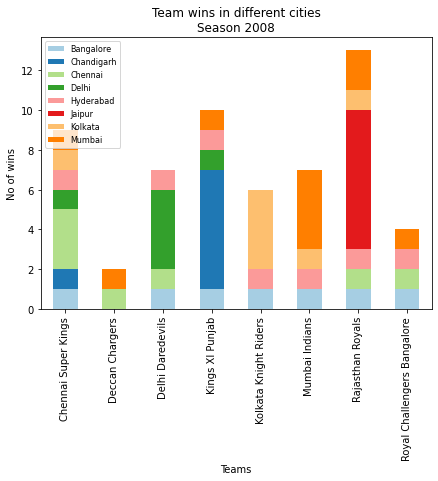

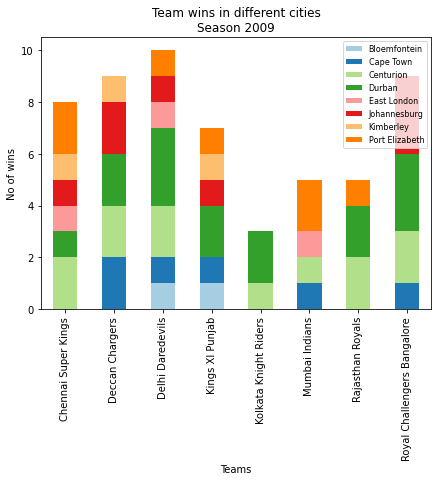

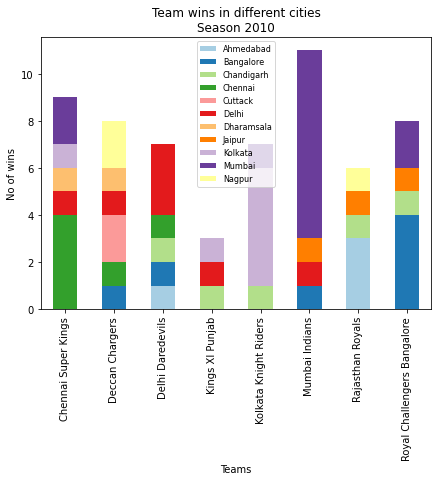

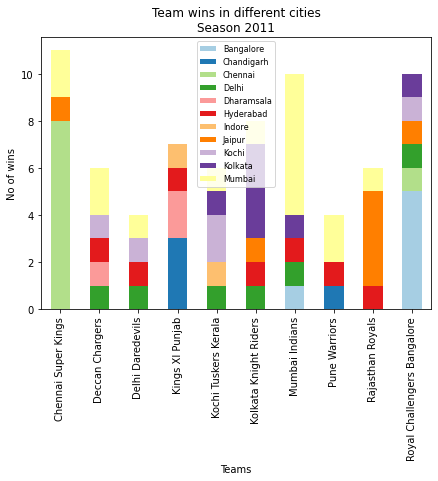

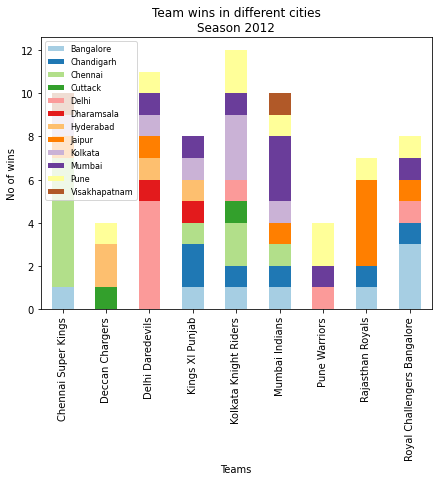

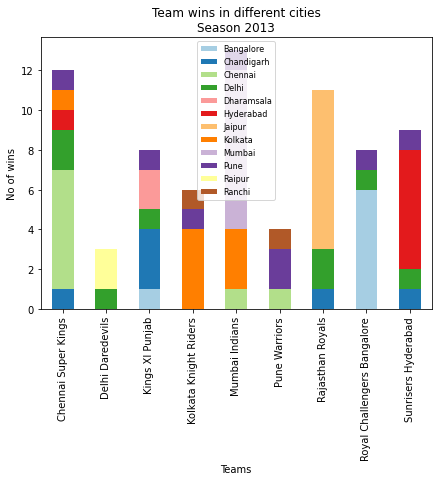

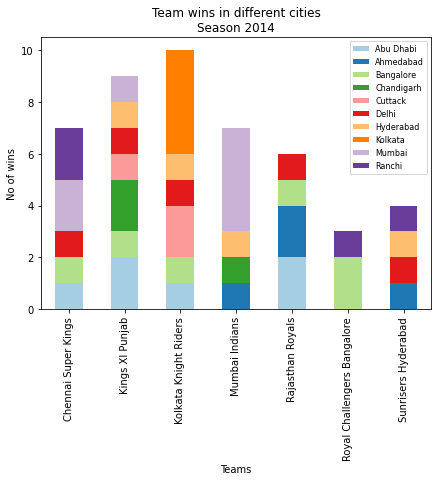

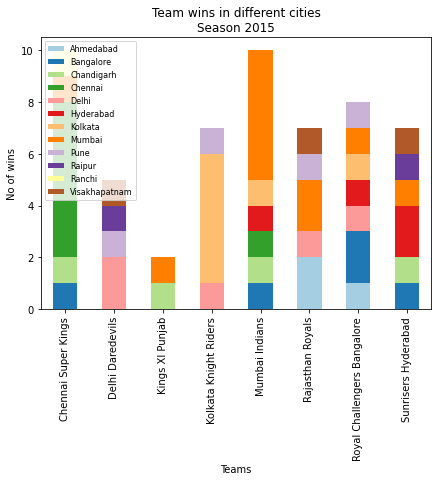

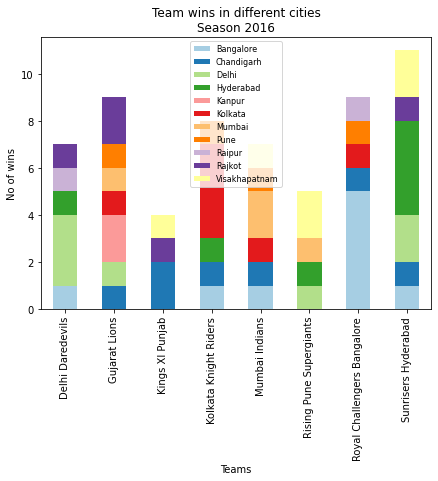

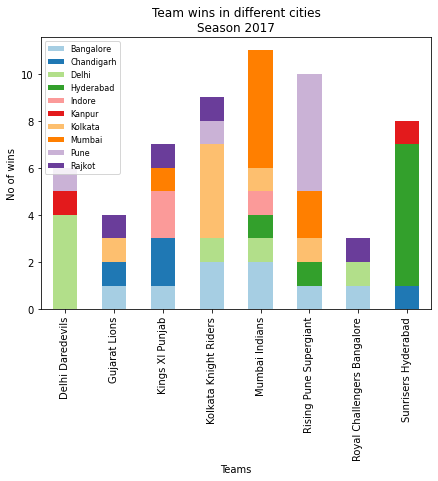

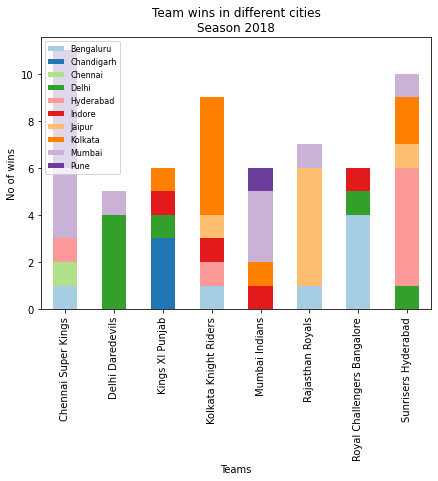

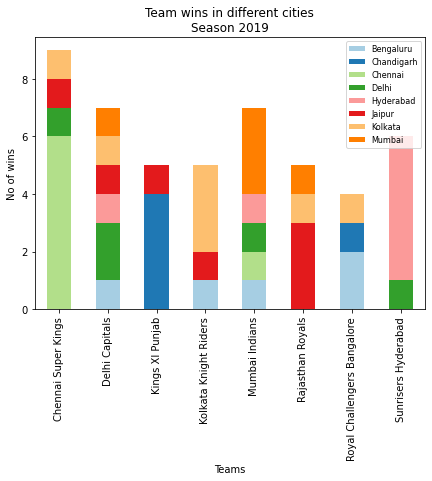

In [ ]:
team_score = df2.groupby(['id', 'innings'])['total_runs'].sum().unstack().reset_index()

matches_agg = pd.merge(df, team_score, left_on = 'id', right_on = 'id', how = 'outer')

team_extras = df2.groupby(['id', 'innings'])['total_extras_runs'].sum().unstack().reset_index()

matches_agg = pd.merge(matches_agg, team_extras, on = 'id', how = 'outer')
print(matches_agg)
x, y = 2008, 2020
while x < y:
    wins_percity = matches_agg[matches_agg['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(matches_agg['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

In [ ]:
df2 = pd.read_csv('/content/innings_data.csv')
df2.head()

,id,season,batsman,bowler,innings,non_striker,replacements,bowled_over,batsman_team,player_out,fielder_caught_out,type_out,extras_wides,extras_legbyes,extras_noballs,extras_byes,extras_penalty,total_extras_runs,batsman_runs,total_runs
0,335988,2008,AC Gilchrist,GD McGrath,1st,JC Buttler,NaN,0.1,Rajasthan Royals,0,0,0,0,1,0,0,0,1,0,1
1,335988,2008,AC Gilchrist,GD McGrath,1st,AM Rahane,NaN,0.2,Rajasthan Royals,0,0,0,0,0,0,0,0,0,0,0
2,335988,2008,AC Gilchrist,GD McGrath,1st,AM Rahane,NaN,0.3,Rajasthan Royals,0,0,0,0,0,0,0,0,0,4,4
3,335988,2008,Y Venugopal Rao,GD McGrath,1st,AM Rahane,NaN,0.4,Rajasthan Royals,0,0,0,0,0,0,0,0,0,0,0
4,335988,2008,Y Venugopal Rao,GD McGrath,1st,AM Rahane,NaN,0.5,Rajasthan Royals,0,0,0,0,0,0,0,0,0,6,6


In [ ]:
df2.drop('replacements' ,axis=1,inplace=True)

In [ ]:
df2.isnull().sum()

id                    0
season                0
batsman               0
bowler                0
innings               0
non_striker           0
bowled_over           0
batsman_team          0
player_out            0
fielder_caught_out    0
type_out              0
extras_wides          0
extras_legbyes        0
extras_noballs        0
extras_byes           0
extras_penalty        0
total_extras_runs     0
batsman_runs          0
total_runs            0
dtype: int64

highest runs scored

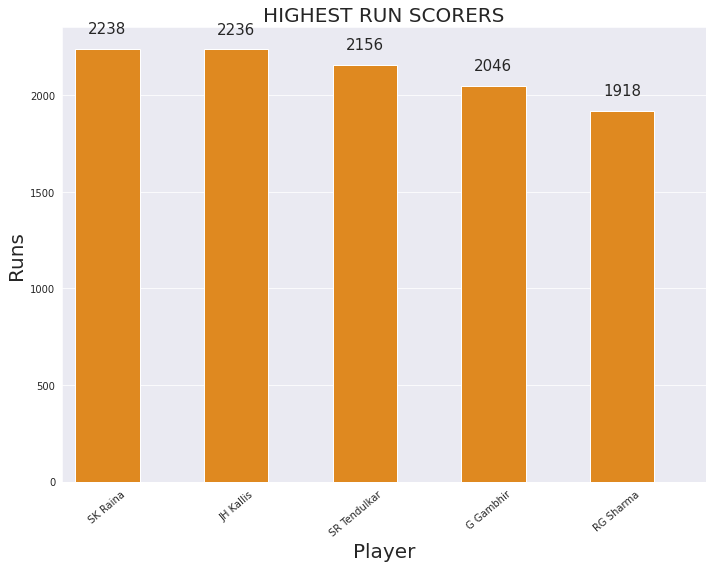

In [ ]:
most_runs = df2[['batsman','batsman_runs']].groupby('batsman').sum().sort_values('batsman_runs',ascending=False)
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = most_runs.head().index, y = most_runs['batsman_runs'].head(), units = most_runs.head().index, color='darkorange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Player').set_size(20)
ax.set_ylabel('Runs').set_size(20)
ax.set_title('HIGHEST RUN SCORERS').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

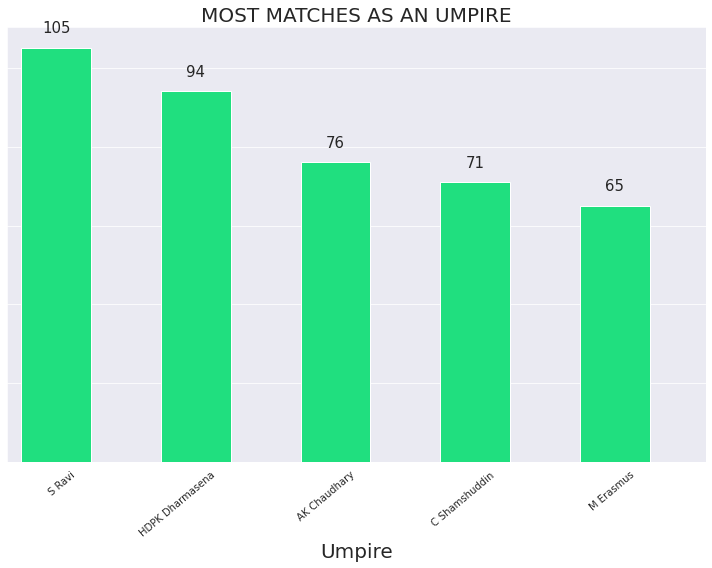

In [ ]:
umpire_most_matches = df['umpire1'].append(df['umpire2']).append(df['umpire3']).value_counts()
most_player_of_match = df['player_of_match'].value_counts()
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = umpire_most_matches.head().index, y = umpire_most_matches.head().values, units = umpire_most_matches.head().index, color='springgreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Umpire').set_size(20)
ax.set_title('MOST MATCHES AS AN UMPIRE').set_size(20)
ax.set_yticklabels(())
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)


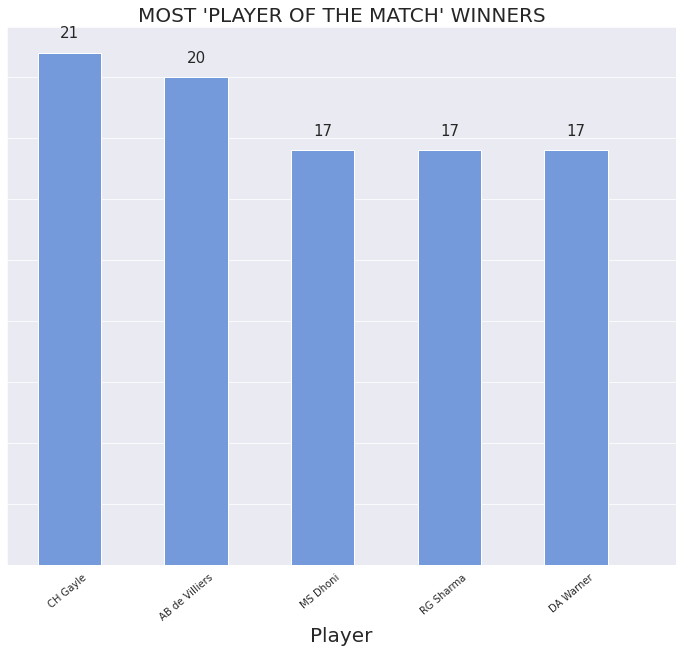

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x=most_player_of_match.head().index,y=most_player_of_match.head().values, color='cornflowerblue')
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Player').set_size(20)
ax.set_yticklabels(())
title = ax.set_title("MOST 'PLAYER OF THE MATCH' WINNERS").set_size(20)
ax.autoscale()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)


Average runs in each over

Batsman aggregates

In [ ]:
batsman_grp = df2.groupby(["id", "innings", "batsman_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
balls_faced = df2[df2["extras_wides"] == 0]
balls_faced = balls_faced.groupby(["id", "innings", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["id", "innings", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["id", "innings", "batsman"], 
                        right_on=["id", "innings", "batsman"], how="left")

fours = df2[ df2["batsman_runs"] == 4]
sixes = df2[ df2["batsman_runs"] == 6]
fours_per_batsman = fours.groupby(["id", "innings", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["id", "innings", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["id", "innings", "batsman", "4s"]
sixes_per_batsman.columns = ["id", "innings", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["id", "innings", "batsman"], 
                        right_on=["id", "innings", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["id", "innings", "batsman"], 
                        right_on=["id", "innings", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)
for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)


batsmen = df[['id','season']].merge(batsmen, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
batsmen.head()


,season,innings,batsman_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,2010,1st,Kings XI Punjab,A Symonds,13,7.0,2.0,0.0,185.71
1,2010,1st,Kings XI Punjab,AC Gilchrist,5,4.0,0.0,0.0,125.00
2,2010,1st,Kings XI Punjab,Anirudh Singh,85,37.0,7.0,6.0,229.73
3,2010,1st,Kings XI Punjab,DR Smith,12,10.0,2.0,0.0,120.00
4,2010,1st,Kings XI Punjab,MD Mishra,1,1.0,0.0,0.0,100.00


Bowler aggregtes

In [ ]:
bowler_grp = df2.groupby(["id", "innings", "bowler","bowled_over"])
bowlers = bowler_grp["total_runs", "extras_wides", "extras_byes", "extras_legbyes", "extras_noballs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["extras_byes"] + bowlers["extras_legbyes"])
bowlers["extras"] = bowlers["extras_wides"] + bowlers["extras_noballs"]

del( bowlers["extras_byes"])
del( bowlers["extras_legbyes"])
del( bowlers["total_runs"])


bowlers_over = bowlers.groupby(['id', 'innings', 'bowler'])['bowled_over'].count().reset_index()
bowlers = bowlers.groupby(['id', 'innings', 'bowler']).sum().reset_index().drop('bowled_over', 1)
bowlers = bowlers_over.merge(bowlers, on=["id", "innings", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['bowled_over'] , 2)
bowlers = df[['id','season']].merge(bowlers, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)

bowlers.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,season,innings,bowler,bowled_over,extras_wides,extras_noballs,runs,extras,Econ
0,2010,1st,A Kumble,21,0,0,31,0,1.48
1,2010,1st,B Akhil,6,0,0,11,0,1.83
2,2010,1st,DW Steyn,20,4,0,39,4,1.95
3,2010,1st,JH Kallis,12,0,0,14,0,1.17
4,2010,1st,KP Pietersen,6,0,0,18,0,3.00


# My Contributions

Data Cleaning

In data cleaning I removed features having more than 90% null values and I replaced old team names with present names.

Total matches won and toss won in each season,
in this section I plotted a pie chat and it is found that less than 50 % of teams won both match and toss.




creating a table with features having more importance features include(total matches played, total won, toss won,total lost from match_data file)

# References

https://www.kaggle.com/vaishaligarg/analysing-ipl-data/notebook

https://www.kaggle.com/nulldata/begin-your-data-analysis-in-python-with-ipl-data

https://medium.com/ai-in-plain-english/ipl-data-analysis-using-python-b6a0dac0a076

https://www.kaggle.com/kerneler/starter-ipl-data-from-2008-2019-d2535f7c-c

https://www.kaggle.com/rkd286/ipl-indian-premier-league-season-1-10-eda
